In [263]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir(r'C:\Users\AJAY NALLA\OneDrive\Desktop\ml project')

In [264]:
os.listdir()

['0325 Decision Trees Advanced.ipynb',
 'Dataset (5).csv',
 'Discharge_profiling.html',
 'pandas-profiling-master',
 'test.csv',
 'train.csv']

# Loading the dataset

In [265]:
df=pd.read_csv('Dataset (5).csv')

In [266]:
df.shape

(164309, 14)

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [268]:
#analysis on raw data
df.describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.95,0.99]).round(0)

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,164309.0,139207.0,164309.0,164309.0,75930.0,164309.0,164309.0,164309.0
mean,10082155.0,73331.0,17.0,1.0,34.0,11.0,25.0,2.0
std,47432.0,60377.0,8.0,1.0,22.0,5.0,12.0,1.0
min,10000001.0,4000.0,0.0,0.0,0.0,0.0,2.0,1.0
1%,10001644.0,19000.0,2.0,0.0,1.0,3.0,6.0,1.0
5%,10008216.0,28000.0,5.0,0.0,5.0,5.0,9.0,1.0
25%,10041078.0,45000.0,11.0,0.0,16.0,8.0,17.0,2.0
50%,10082155.0,63000.0,17.0,0.0,31.0,10.0,23.0,2.0
75%,10123232.0,88698.0,23.0,1.0,50.0,14.0,32.0,3.0
95%,10156094.0,150000.0,31.0,3.0,74.0,20.0,47.0,3.0


In [269]:
#percentage unique values
for o in df.columns:
    print(o,'------',round((df[o].nunique()/df.shape[0])*100,3))

Loan_ID ------ 100.0
Loan_Amount_Requested ------ 0.785
Length_Employed ------ 0.007
Home_Owner ------ 0.003
Annual_Income ------ 7.489
Income_Verified ------ 0.002
Purpose_Of_Loan ------ 0.009
Debt_To_Income ------ 2.406
Inquiries_Last_6Mo ------ 0.005
Months_Since_Deliquency ------ 0.074
Number_Open_Accounts ------ 0.035
Total_Accounts ------ 0.061
Gender ------ 0.001
Interest_Rate ------ 0.002


# Preprocessing the data

In [270]:
#finding the null values
k=df.isnull().sum()

In [271]:
#we identified null values in the following features
[features for features in df.columns if df[features].isnull().sum()>0]

['Length_Employed', 'Home_Owner', 'Annual_Income', 'Months_Since_Deliquency']

In [272]:
#percentage of missing values
[(k[i]/164309).round(2) for i in range(0,14)]

[0.0, 0.0, 0.04, 0.15, 0.15, 0.0, 0.0, 0.0, 0.0, 0.54, 0.0, 0.0, 0.0, 0.0]

In [273]:
#filling the null values with the mean for --->numerical
df['Annual_Income']=df['Annual_Income'].fillna(df['Annual_Income'].mean())
df['Months_Since_Deliquency']=df['Months_Since_Deliquency'].fillna(df['Months_Since_Deliquency'].mean())

In [274]:
df['Length_Employed']=df['Length_Employed'].map({'< 1 year':1,'1 years':2,'2 years':3,'3 years':4,'4 years':5,'5 years':6,'6 years':7,'7 years':8,'8 years':9,'9 years':10,'10+ years':11})

In [275]:
#filling null values with mode for ---->categorical
df['Home_Owner']=df['Home_Owner'].fillna(df['Home_Owner'].mode()[0])
df['Length_Employed']=df['Length_Employed'].fillna(df['Length_Employed'].mean())

In [276]:
df['Length_Employed']=df['Length_Employed'].astype(int)

In [277]:
df['Income_Verified']=df['Income_Verified'].str.replace('VERIFIED - income source','VERIFIED - income')

In [278]:
df['Loan_Amount_Requested']=df['Loan_Amount_Requested'].str.replace(',',"")
df['Loan_Amount_Requested']=df['Loan_Amount_Requested'].astype(int)

In [279]:

ln=[]
for j in (df['Loan_Amount_Requested']):
    if j<=1000:
        ln.append('amt<1000')
    elif j>1000 and j<=7000:
        ln.append('amt<7000')
    elif j>7000 and j<=14000:
        ln.append('amt<14000')
    elif j>14000 and j<=21000:
        ln.append('amt<21000')
    elif j>21000 and j<=28000:
        ln.append('amt<28000')
    elif j>28000 and j<=35000:
        ln.append('amt<35000')
    else:
        ln.append('amt>35000')
        
    

#### EXPLORATORY DATA ANALYSIS--->categorical

C:\Users\AJAY NALLA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

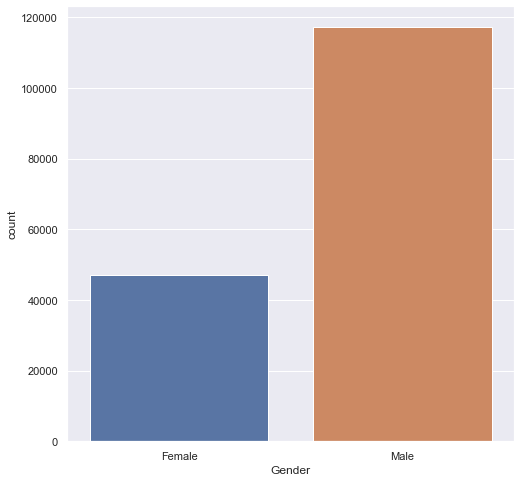

In [280]:
sns.countplot(df['Gender'])
#male applicants are large in number

In [281]:
pd.crosstab(df['Gender'],df['Interest_Rate'])

Interest_Rate,1,2,3
Gender,,,
Female,9669,20415,17049
Male,24137,50165,42874


C:\Users\AJAY NALLA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


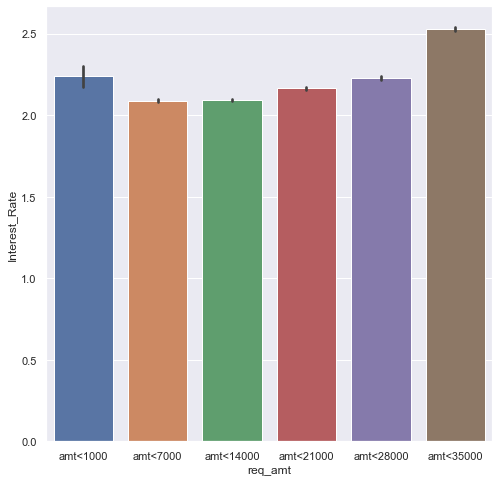

In [282]:
df['req_amt']=ln
sns.barplot(df['req_amt'],df['Interest_Rate'],order=['amt<1000','amt<7000','amt<14000','amt<21000','amt<28000','amt<35000'])
sns.set(rc={"figure.figsize":(7, 6)})

C:\Users\AJAY NALLA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


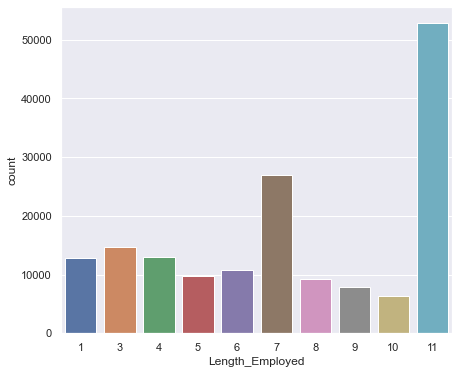

In [283]:
sns.countplot(df['Length_Employed'])
sns.set(rc={"figure.figsize":(16, 8)})

In [284]:
#analysis on length employed
dfl=df[df['Length_Employed']==11]
dfl2=df[df['Length_Employed']==7]
k_len=dfl.append(dfl2)
k_len.shape

(79802, 15)

In [285]:
k_len['Interest_Rate'].value_counts(normalize=True)

2    0.425666
3    0.372597
1    0.201737
Name: Interest_Rate, dtype: float64

In [286]:
k_len['Loan_Amount_Requested'].value_counts()

10000    5617
12000    4205
20000    4187
15000    4185
35000    3231
         ... 
18175       1
27675       1
725         1
29275       1
34575       1
Name: Loan_Amount_Requested, Length: 1238, dtype: int64

In [287]:
k_len['Purpose_Of_Loan'].value_counts()

debt_consolidation    47616
credit_card           17839
home_improvement       4873
other                  4034
major_purchase         1458
small_business          998
car                     794
medical                 731
vacation                413
moving                  357
house                   328
wedding                 279
renewable_energy         53
educational              29
Name: Purpose_Of_Loan, dtype: int64

In [288]:
df['Purpose_Of_Loan'].value_counts()

debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: Purpose_Of_Loan, dtype: int64

In [289]:
Total=(df['Debt_To_Income']*(df['Annual_Income']/12)).round(0)

In [290]:
df['Total_debts']=Total

In [291]:
t_debl=df[df['Total_debts']>100000]

In [292]:
t_debl['Interest_Rate']
#69211 people are greater than 100000 debt
#for total debt greater than 100000 ,41% of customers are alloted 2% interest rate and 39% are alloted 3% intrest rate

0         1
4         1
9         1
10        2
12        2
         ..
164302    2
164303    3
164306    1
164307    3
164308    2
Name: Interest_Rate, Length: 69211, dtype: int64

C:\Users\AJAY NALLA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Home_Owner', ylabel='count'>

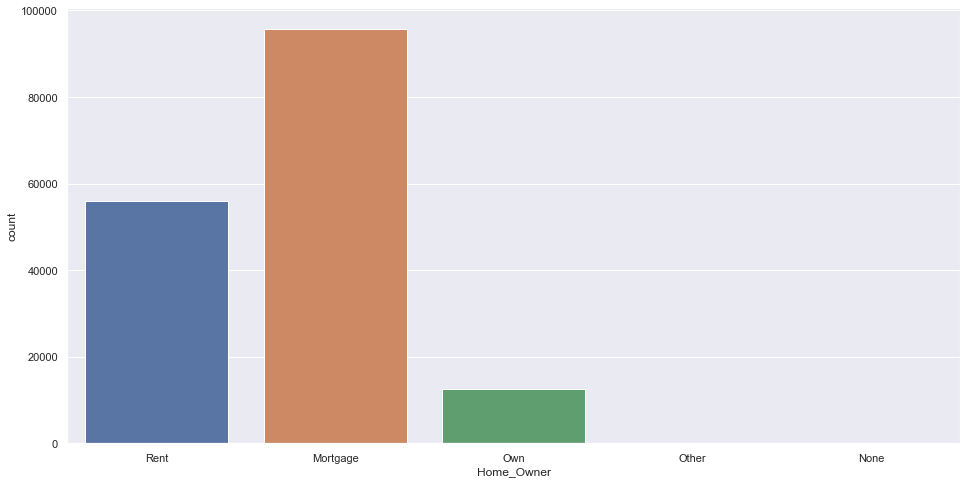

In [293]:
sns.countplot(df['Home_Owner'])
#applicants with ownership as mortgage is high

C:\Users\AJAY NALLA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income_Verified', ylabel='count'>

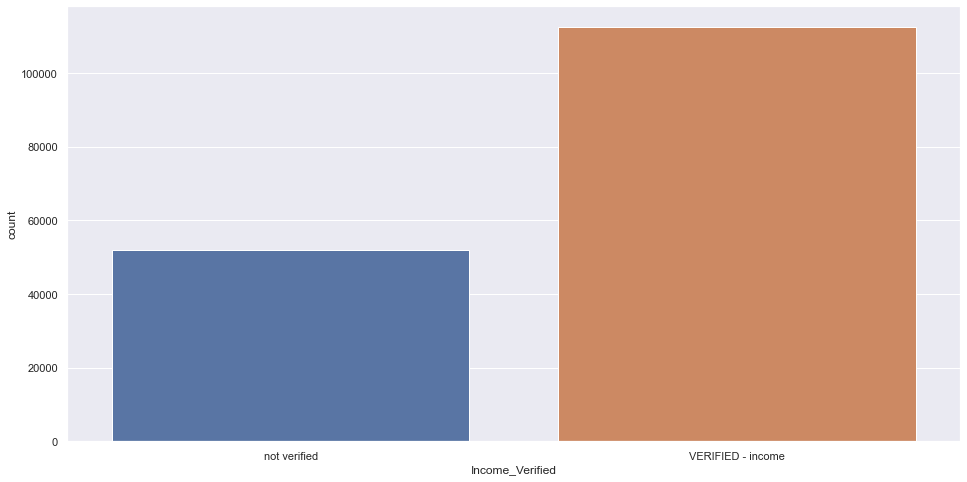

In [294]:
sns.countplot(df['Income_Verified'])

C:\Users\AJAY NALLA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


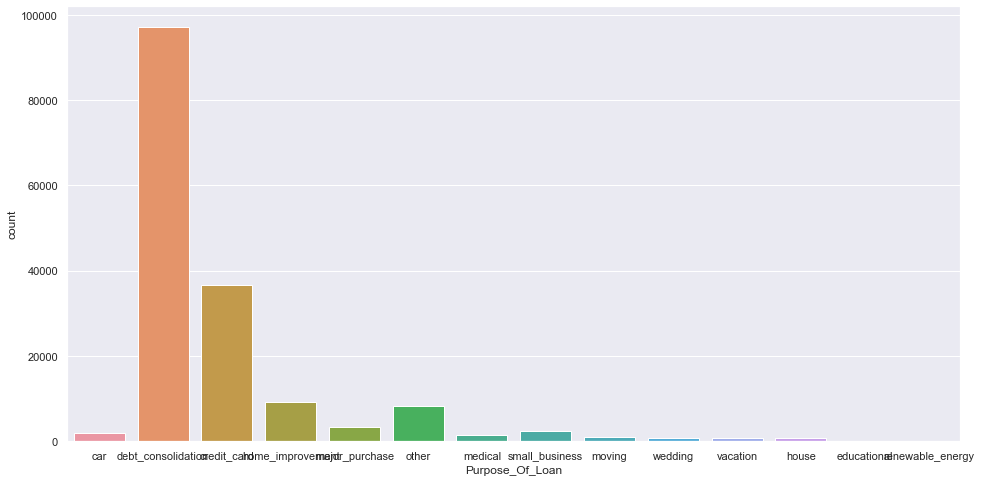

In [295]:
sns.countplot(df['Purpose_Of_Loan'])
sns.set(rc={"figure.figsize":(16, 8)})
#debt consolidation is popular reason for taking loan

([<matplotlib.patches.Wedge at 0x287dd97a520>,
 [Text(-0.4277288057504124, 1.0134338008628516, 'debt_consolidation'),
  Text(-0.030495125596785917, -1.0995772129845345, 'credit_card'),
  Text(0.864834670705776, -0.6797506839608418, 'home_improvement'),
  Text(1.0479916129885576, -0.3342358136191295, 'other'),
  Text(1.097329427865964, -0.07660369925373141, 'major_purchase')],
 [Text(-0.23330662131840674, 0.552782073197919, '62.71%'),
  Text(-0.016633704870974136, -0.5997693889006551, '23.69%'),
  Text(0.4717280022031505, -0.3707731003422773, '5.99%'),
  Text(0.5716317889028496, -0.18231044379225245, '5.39%'),
  Text(0.5985433242905258, -0.041783835956580764, '2.22%')])

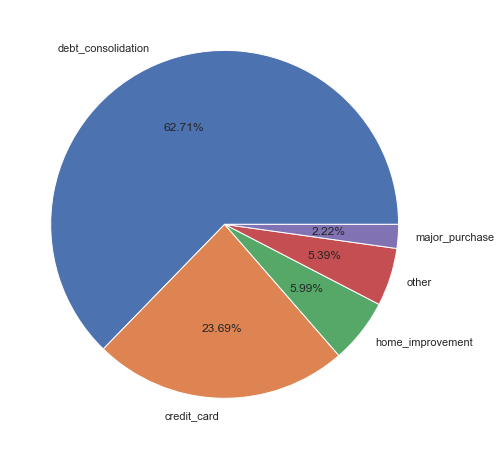

In [296]:
k=df['Purpose_Of_Loan'].value_counts()
plt.pie(k[:5],labels=['debt_consolidation','credit_card','home_improvement','other','major_purchase'],autopct='%1.2f%%')

In [297]:
k[:5]

debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
Name: Purpose_Of_Loan, dtype: int64

#### EXPLORATORY DATA ANALYSIS--->numerical

In [298]:
df['Annual_Income']=np.log(df['Annual_Income'])
#apply log transformation to the attribute

C:\Users\AJAY NALLA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


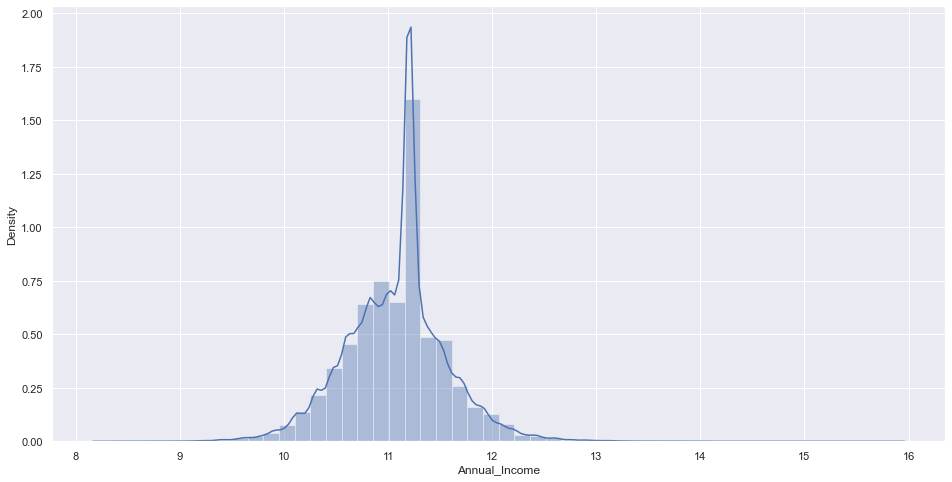

In [299]:
sns.distplot(df['Annual_Income'])
sns.set(rc={"figure.figsize":(8, 8)})

<AxesSubplot:xlabel='Debt_To_Income', ylabel='Count'>

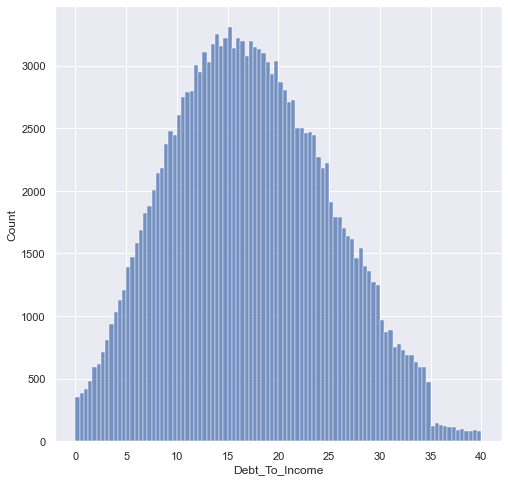

In [300]:
sns.histplot(df['Debt_To_Income'])

<AxesSubplot:xlabel='Inquiries_Last_6Mo', ylabel='Count'>

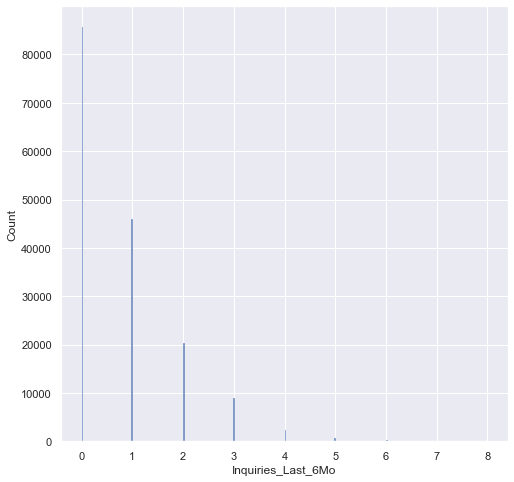

In [301]:
sns.histplot(df['Inquiries_Last_6Mo'])

C:\Users\AJAY NALLA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Months_Since_Deliquency', ylabel='Density'>

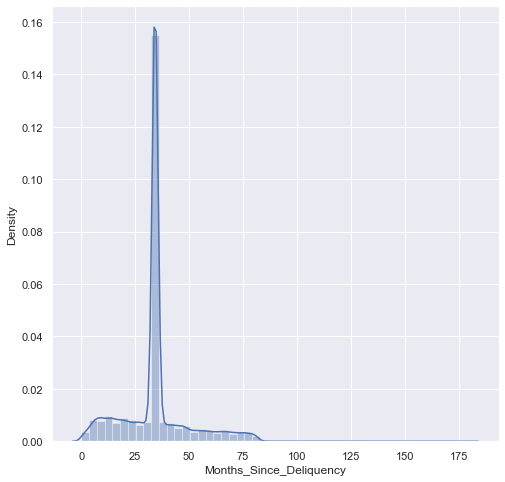

In [302]:
sns.distplot(df['Months_Since_Deliquency'])

<AxesSubplot:xlabel='Number_Open_Accounts', ylabel='Count'>

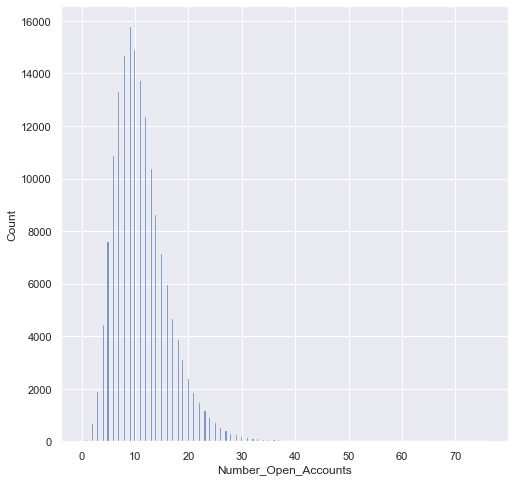

In [303]:
sns.histplot((df['Number_Open_Accounts']))

C:\Users\AJAY NALLA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Accounts', ylabel='Number_Open_Accounts'>

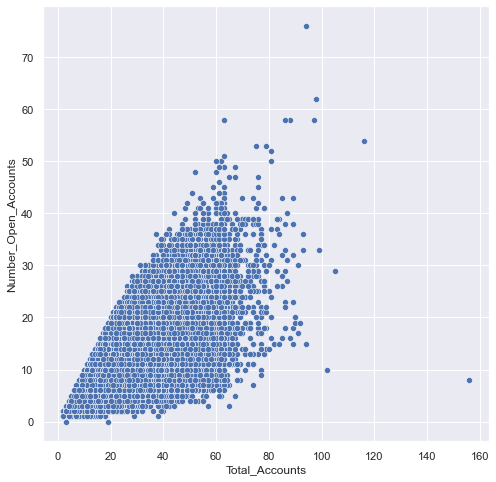

In [304]:
sns.scatterplot(df['Total_Accounts'],df['Number_Open_Accounts'])

<AxesSubplot:xlabel='Interest_Rate', ylabel='Count'>

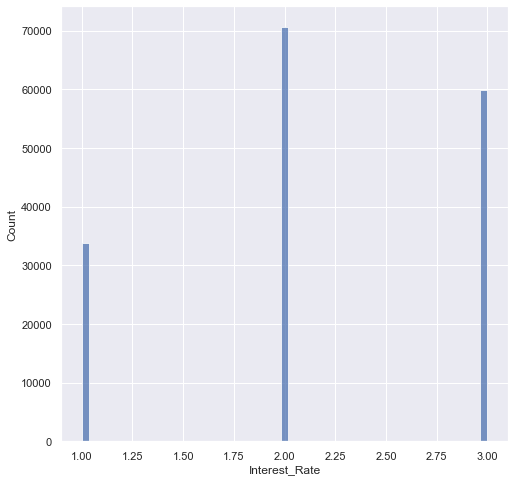

In [305]:
sns.histplot(df['Interest_Rate'])

C:\Users\AJAY NALLA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number_Open_Accounts', ylabel='Interest_Rate'>

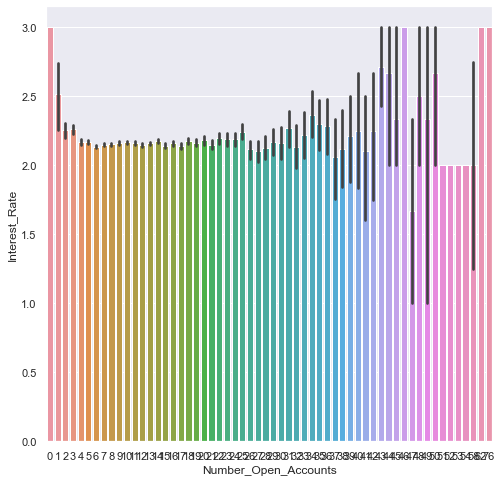

In [306]:
sns.barplot(df['Number_Open_Accounts'],df['Interest_Rate'],)


In [307]:
df

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,req_amt,Total_debts
0,10000001,7000,1,Rent,11.127263,not verified,car,18.37,0,34.229356,9,14,Female,1,amt<7000,104097.0
1,10000002,30000,5,Mortgage,11.202741,VERIFIED - income,debt_consolidation,14.93,0,17.000000,12,24,Female,3,amt<35000,91236.0
2,10000003,24725,8,Mortgage,11.232767,VERIFIED - income,debt_consolidation,15.88,0,34.229356,12,16,Male,3,amt<28000,100000.0
3,10000004,16000,1,Mortgage,10.935960,VERIFIED - income,debt_consolidation,14.34,3,34.229356,16,22,Male,3,amt<21000,67111.0
4,10000005,17000,9,Own,11.472103,VERIFIED - income,debt_consolidation,22.17,1,34.229356,19,30,Female,1,amt<21000,177360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,10164305,20725,11,Rent,11.202741,VERIFIED - income,credit_card,13.56,0,34.229356,13,16,Male,2,amt<21000,82864.0
164305,10164306,6000,9,Own,11.202741,VERIFIED - income,small_business,9.12,0,36.000000,13,30,Male,2,amt<7000,55732.0
164306,10164307,20250,11,Mortgage,11.202741,VERIFIED - income,credit_card,18.17,1,34.229356,17,30,Male,1,amt<21000,111036.0
164307,10164308,10000,5,Rent,11.202741,not verified,major_purchase,18.75,1,48.000000,16,62,Female,3,amt<14000,114580.0


C:\Users\AJAY NALLA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


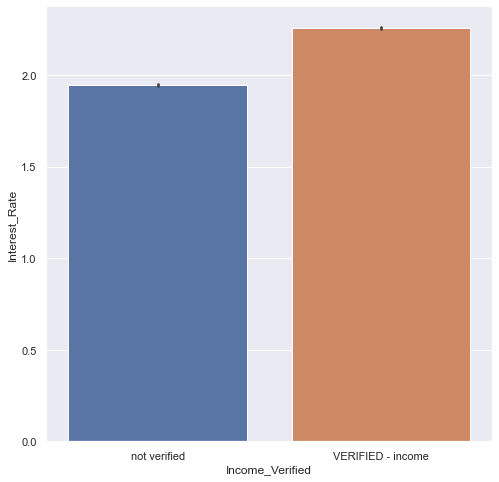

In [308]:
sns.barplot(df['Income_Verified'],df['Interest_Rate'])
sns.set(rc={"figure.figsize":(5,5)})
#customers whose income source is verified are getting high interest rate comparitively the one's whose income source is not verified

C:\Users\AJAY NALLA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Home_Owner', ylabel='Interest_Rate'>

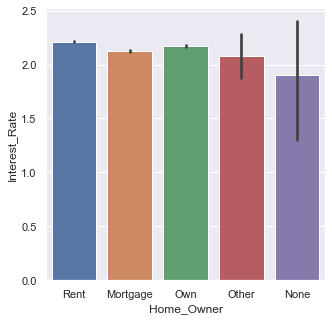

In [309]:
sns.barplot(df['Home_Owner'],df['Interest_Rate'])
#rented people are alloted more interest rate

C:\Users\AJAY NALLA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length_Employed', ylabel='Interest_Rate'>

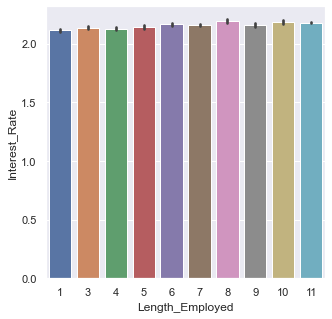

In [310]:
sns.barplot(df['Length_Employed'],df['Interest_Rate'])

C:\Users\AJAY NALLA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


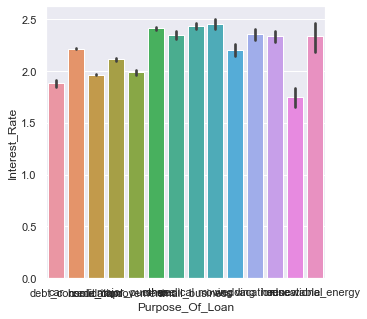

In [311]:
sns.barplot(df['Purpose_Of_Loan'],df['Interest_Rate'])
sns.set(rc={"figure.figsize":(16,10)})

In [312]:
df

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,req_amt,Total_debts
0,10000001,7000,1,Rent,11.127263,not verified,car,18.37,0,34.229356,9,14,Female,1,amt<7000,104097.0
1,10000002,30000,5,Mortgage,11.202741,VERIFIED - income,debt_consolidation,14.93,0,17.000000,12,24,Female,3,amt<35000,91236.0
2,10000003,24725,8,Mortgage,11.232767,VERIFIED - income,debt_consolidation,15.88,0,34.229356,12,16,Male,3,amt<28000,100000.0
3,10000004,16000,1,Mortgage,10.935960,VERIFIED - income,debt_consolidation,14.34,3,34.229356,16,22,Male,3,amt<21000,67111.0
4,10000005,17000,9,Own,11.472103,VERIFIED - income,debt_consolidation,22.17,1,34.229356,19,30,Female,1,amt<21000,177360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,10164305,20725,11,Rent,11.202741,VERIFIED - income,credit_card,13.56,0,34.229356,13,16,Male,2,amt<21000,82864.0
164305,10164306,6000,9,Own,11.202741,VERIFIED - income,small_business,9.12,0,36.000000,13,30,Male,2,amt<7000,55732.0
164306,10164307,20250,11,Mortgage,11.202741,VERIFIED - income,credit_card,18.17,1,34.229356,17,30,Male,1,amt<21000,111036.0
164307,10164308,10000,5,Rent,11.202741,not verified,major_purchase,18.75,1,48.000000,16,62,Female,3,amt<14000,114580.0


C:\Users\AJAY NALLA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Inquiries_Last_6Mo', ylabel='Interest_Rate'>

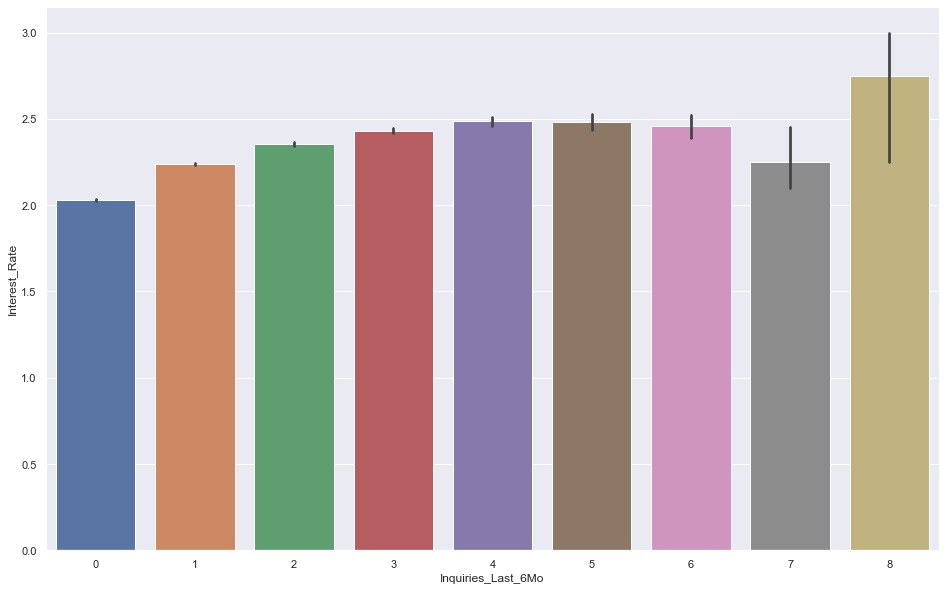

In [313]:
sns.barplot(df['Inquiries_Last_6Mo'],df['Interest_Rate'])

# Encoding

In [314]:
df['Gender']=df['Gender'].map({'Female':0,'Male':1})

In [315]:
df['Purpose_Of_Loan']=df['Purpose_Of_Loan'].map({'debt_consolidation':1,'credit_card':2,'home_improvement':3,'other':4,'major_purchase':5,'small_business':6,'car':7,'medical':8,'moving':9,'vacation':10,'wedding':11,'house':12,'renewable_energy':13,'educational':14})

In [316]:
df['Home_Owner']=df['Home_Owner'].fillna(df['Home_Owner'].mode()[0])

In [317]:
#removing other,none as there are only 59 entities
df=df[df['Home_Owner']!='Other']
df=df[df['Home_Owner']!='None']

In [318]:
#converting  house_owner 3 class into two and performing feature engineering
h_own=pd.get_dummies(df['Home_Owner'],drop_first=True)
df=pd.concat([df,h_own],axis=1)
df.drop(['Home_Owner'],axis=1,inplace=True)

In [319]:
df['Income_Verified']=df['Income_Verified'].replace('VERIFIED - income',1)
df['Income_Verified']=df['Income_Verified'].replace('not verified',0)

# performing capping to remove the outliers

In [320]:
df['Months_Since_Deliquency']=np.where(df['Months_Since_Deliquency']>79 ,79 , df['Months_Since_Deliquency'])

In [321]:
df['Debt_To_Income']=np.where(df['Debt_To_Income']>34.67 ,34.67 , df['Debt_To_Income'])

In [324]:
#creating bins for debt_to_income
z=[]
for i in (df['Debt_To_Income']):
    if i<=1:
        z.append('debt<1')
    elif i>1 and i<=10:
        z.append('debt<10')
    elif i>10 and i<=20:
        z.append('debt<20')
    elif i>20 and i<=30:
        z.append('debt<30')
    else:
        z.append('debt>30')

In [325]:
df['debt ratio']=z

C:\Users\AJAY NALLA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


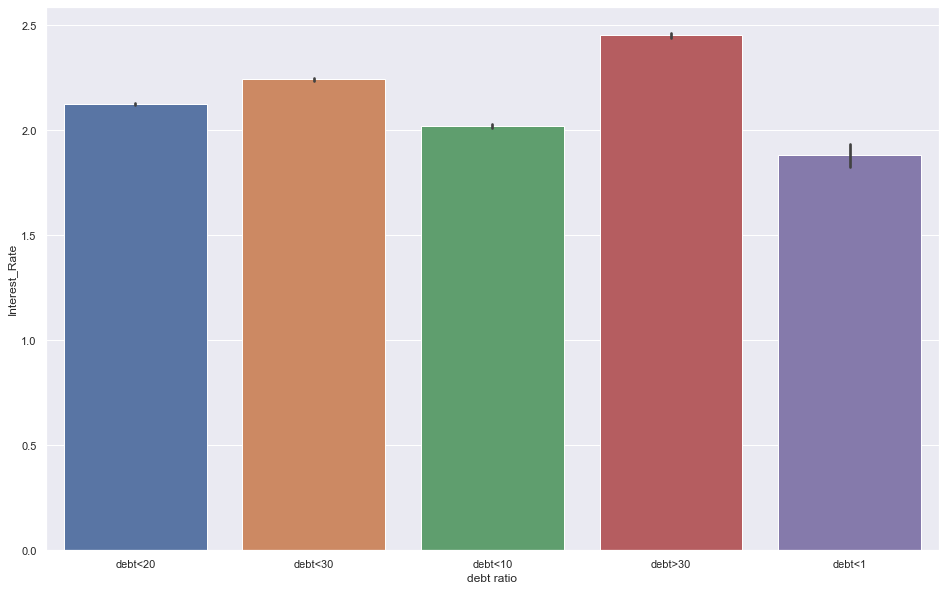

In [326]:
sns.barplot(df['debt ratio'],df['Interest_Rate'])
sns.set(rc={"figure.figsize":(5,5)})

In [104]:
df['Inquiries_Last_6Mo']=np.where(df['Inquiries_Last_6Mo']>4 ,4 , df['Inquiries_Last_6Mo'])

In [105]:
df['Total_Accounts']=np.where(df['Total_Accounts']>59 ,59 , df['Total_Accounts'])

In [106]:
df['Number_Open_Accounts']=np.where(df['Number_Open_Accounts']>27 ,27 , df['Number_Open_Accounts'])


# analysis after removing outliers

In [327]:
p=pd.crosstab(df['Number_Open_Accounts'],df['Interest_Rate'])

In [328]:
#creating bins for debt_to_income
z=[]
for i in (df['Debt_To_Income']):
    if i<=1:
        z.append('debt<1')
    elif i>1 and i<=10:
        z.append('debt<10')
    elif i>10 and i<=20:
        z.append('debt<20')
    elif i>20 and i<=30:
        z.append('debt<30')
    else:
        z.append('debt>30')

C:\Users\AJAY NALLA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


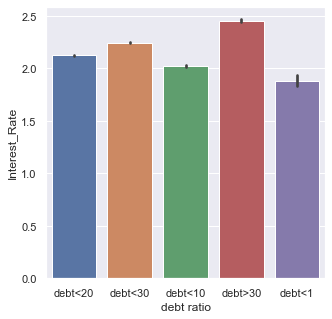

In [329]:
sns.barplot(df['debt ratio'],df['Interest_Rate'])
sns.set(rc={"figure.figsize":(5,5)})

In [333]:
pd.crosstab(df['Income_Verified'],df['Interest_Rate'],normalize=True)

Interest_Rate,1,2,3
Income_Verified,,,
0,0.090429,0.152104,0.073078
1,0.115300,0.277449,0.291641


C:\Users\AJAY NALLA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Income', ylabel='Loan_Amount_Requested'>

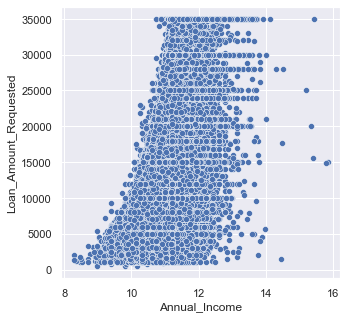

In [335]:
sns.scatterplot(df['Annual_Income'],df['Loan_Amount_Requested'])

C:\Users\AJAY NALLA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


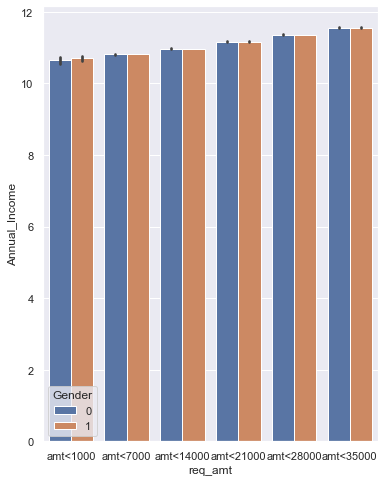

In [337]:
sns.barplot('req_amt','Annual_Income',hue='Gender',data=df,order=['amt<1000','amt<7000','amt<14000','amt<21000','amt<28000','amt<35000'])
sns.set(rc={'figure.figsize':(8,8)})

In [340]:
dfcor=df.drop(labels=['Loan_ID'],axis=1)

# correlation Matrix

<AxesSubplot:>

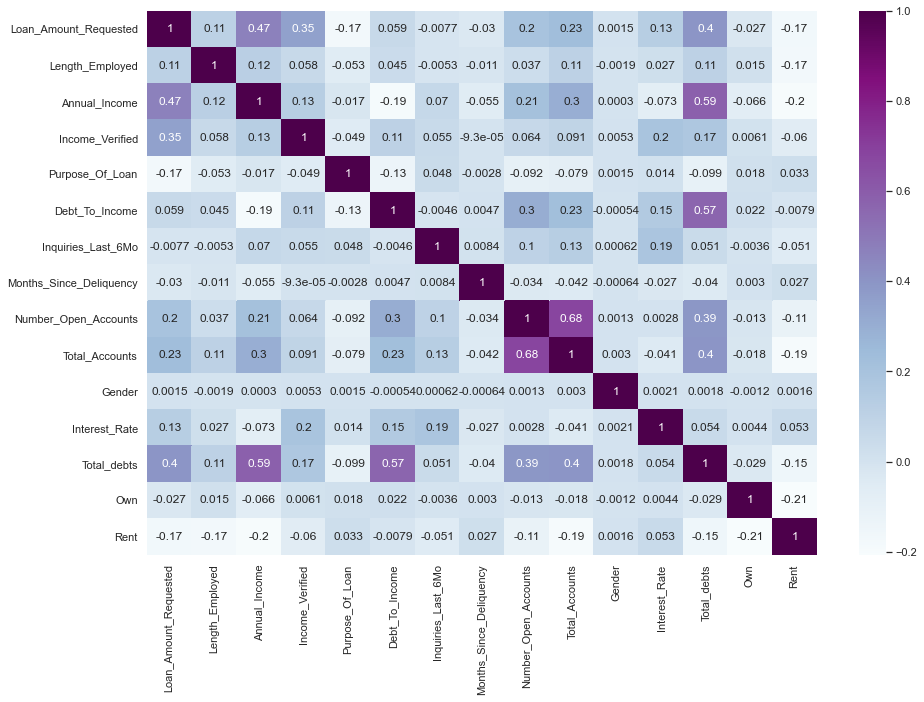

In [341]:
corr = dfcor.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot= True, cmap='BuPu')

# model building

In [349]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score

#### Creating a User Defined function to compare model performance on Train and Test samples

In [372]:
def compare_train_test(model,X_train,y_train):
    y_train_predicted = model.predict(X_train)
    y_test_predicted = model.predict(X_test)
    cr_train = classification_report(y_train,y_train_predicted)
    cr_test = classification_report(y_test,y_test_predicted)
    print(round(model.score(X_train,y_train)*100,2),cr_train,'\n',round(model.score(X_test,y_test)*100,2),cr_test)
    print('ACCURACY is',model.score(X_test,y_test)*100)
    #cross validation
    score = cross_val_score(model,X,y,cv=5)
    print('CROSS_VALIDATION is',np.mean(score)*100)
    from yellowbrick.classifier import ROCAUC
    visualizer = ROCAUC(loan_pred)
    visualizer.fit(X_train,y_train) # Fit the training data to the visualizer
    visualizer.score(X_train,y_train) # Evaluate the model on the test data
    visualizer.show();

In [373]:
X=df.drop(labels=['Interest_Rate','req_amt','Total_debts','debt ratio'],axis=1)
y=df['Interest_Rate']

In [374]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [375]:
loan_pred=tree.DecisionTreeClassifier(random_state = 2)
loan_pred.fit(X_train,y_train)

DecisionTreeClassifier(random_state=2)

100.0               precision    recall  f1-score   support

           1       1.00      1.00      1.00     25391
           2       1.00      1.00      1.00     53035
           3       1.00      1.00      1.00     44761

    accuracy                           1.00    123187
   macro avg       1.00      1.00      1.00    123187
weighted avg       1.00      1.00      1.00    123187
 
 42.26               precision    recall  f1-score   support

           1       0.31      0.32      0.31      8400
           2       0.45      0.44      0.45     17519
           3       0.46      0.46      0.46     15144

    accuracy                           0.42     41063
   macro avg       0.40      0.41      0.41     41063
weighted avg       0.42      0.42      0.42     41063

ACCURACY is 42.25701970143439
CROSS_VALIDATION is 41.923896499238964


C:\Users\AJAY NALLA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


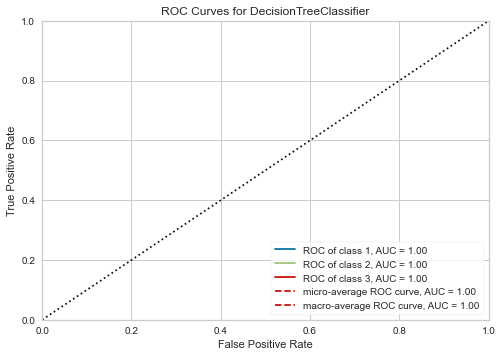

In [378]:
compare_train_test(loan_pred,X_train,y_train)

# Pruning

### grid search cv for hypertuning parameters

In [382]:
from sklearn.model_selection import GridSearchCV

In [386]:
variable_options={'min_samples_leaf':[5,10,20,30,40,50,60,70,80,90,100],'criterion':['gini','entropy'],'splitter':['best','random']
}
hyper= GridSearchCV(loan_pred,variable_options,cv = 5, return_train_score=True,
                                  n_jobs=-1, verbose=1,scoring='accuracy')
hyper.fit(X_train,y_train)
hyper.best_params_

Fitting 5 folds for each of 44 candidates, totalling 220 fits


{'criterion': 'gini', 'min_samples_leaf': 100, 'splitter': 'best'}

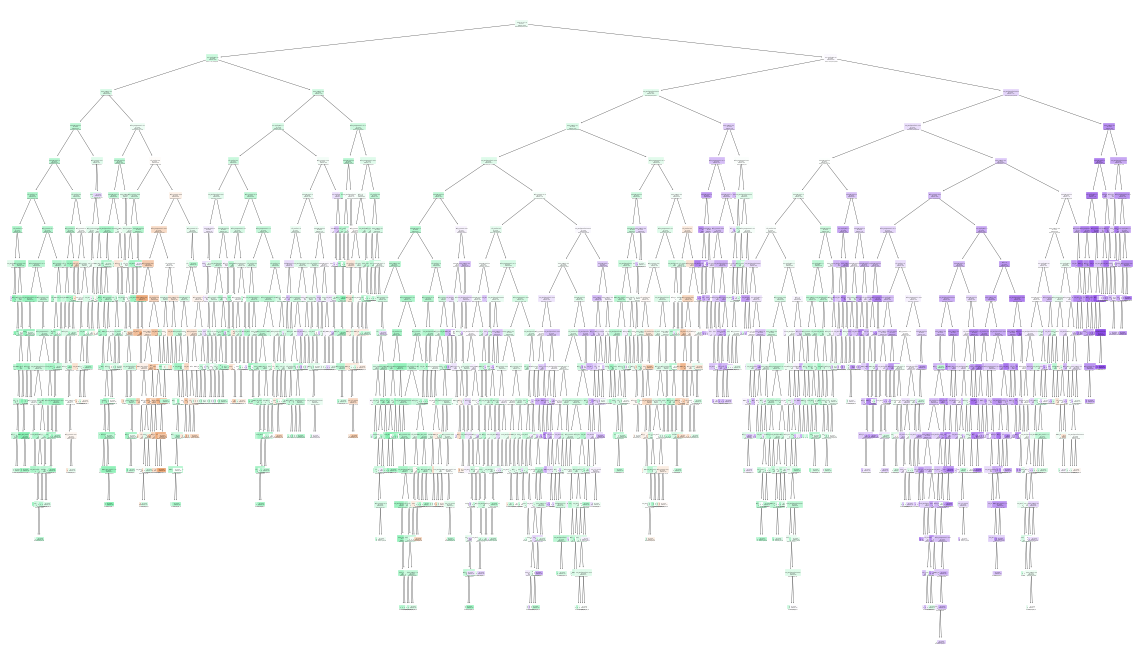

In [387]:
#pruning after applying all the critirea
response_model_pruned = tree.DecisionTreeClassifier(random_state = 1,min_samples_leaf=100,splitter='best')
response_model_pruned.fit(X_train,y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(response_model_pruned, filled=True,feature_names = X_train.columns);
plt.show()

54.55               precision    recall  f1-score   support

           1       0.53      0.28      0.37     25391
           2       0.52      0.64      0.58     53035
           3       0.58      0.58      0.58     44761

    accuracy                           0.55    123187
   macro avg       0.54      0.50      0.51    123187
weighted avg       0.55      0.55      0.54    123187
 
 50.59               precision    recall  f1-score   support

           1       0.46      0.25      0.32      8400
           2       0.48      0.60      0.53     17519
           3       0.55      0.54      0.55     15144

    accuracy                           0.51     41063
   macro avg       0.50      0.46      0.47     41063
weighted avg       0.50      0.51      0.50     41063

ACCURACY is 50.58812069259431
CROSS_VALIDATION is 50.67945205479452


C:\Users\AJAY NALLA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


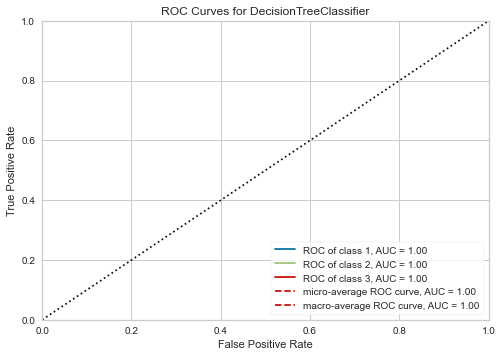

In [389]:
compare_train_test(response_model_pruned,X_train,y_train)

#### using under sampling

85.14               precision    recall  f1-score   support

           1       0.90      0.83      0.86     33791
           2       0.80      0.86      0.83     33791
           3       0.86      0.86      0.86     33791

    accuracy                           0.85    101373
   macro avg       0.85      0.85      0.85    101373
weighted avg       0.85      0.85      0.85    101373
 
 85.09               precision    recall  f1-score   support

           1       0.90      0.83      0.86      6830
           2       0.80      0.86      0.83      6700
           3       0.86      0.86      0.86      6745

    accuracy                           0.85     20275
   macro avg       0.85      0.85      0.85     20275
weighted avg       0.85      0.85      0.85     20275

ACCURACY is 85.09001233045622
CROSS_VALIDATION is 41.923896499238964


C:\Users\AJAY NALLA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


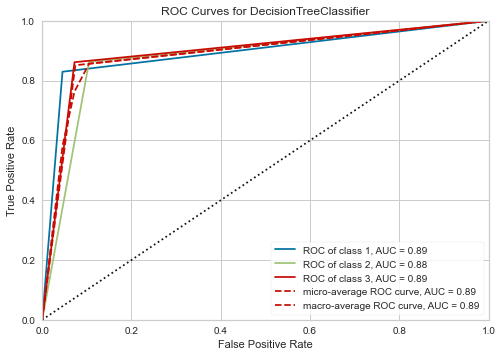

In [394]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
resampled_X, resampled_y = rus.fit_resample(X, y)
from collections import Counter
Counter(resampled_y)
from collections import Counter
Counter(resampled_y)
X_train, X_test, y_train, y_test = train_test_split(resampled_X, resampled_y, test_size=0.2, random_state=True)
compare_train_test(loan_pred,resampled_X,resampled_y)

#### using over sampling for class imbalance

85.15               precision    recall  f1-score   support

           1       0.90      0.83      0.86     70554
           2       0.80      0.86      0.83     70554
           3       0.86      0.86      0.86     70554

    accuracy                           0.85    211662
   macro avg       0.85      0.85      0.85    211662
weighted avg       0.85      0.85      0.85    211662
 
 76.73               precision    recall  f1-score   support

           1       0.83      0.77      0.80     14061
           2       0.70      0.76      0.73     14010
           3       0.78      0.77      0.77     14262

    accuracy                           0.77     42333
   macro avg       0.77      0.77      0.77     42333
weighted avg       0.77      0.77      0.77     42333

ACCURACY is 76.72501358278411
CROSS_VALIDATION is 41.923896499238964


C:\Users\AJAY NALLA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


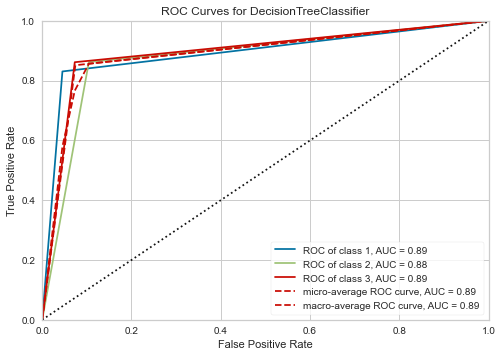

In [396]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
resampled_X, resampled_y = ros.fit_resample(X, y)
from collections import Counter
Counter(resampled_y)
from collections import Counter
Counter(resampled_y)
X_train, X_test, y_train, y_test = train_test_split(resampled_X, resampled_y, test_size=0.2, random_state=42)
compare_train_test(loan_pred,resampled_X,resampled_y)

# using smote for class imbalance

In [1]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(sampling_strategy='minority')

In [ ]:
X_smote,y_smote = sm.fit_resample(X,y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.20,random_state=42,stratify=y_smote)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
response_model_smote = tree.DecisionTreeClassifier(random_state = 2,min_samples_leaf=20)
response_model_smote.fit(X_train,y_train)

In [ ]:
compare_train_test(response_model_smote)

In [ ]:
scor = cross_val_score(loan_pred,X_smote,y_smote,cv=5)

In [ ]:
print('cross_validation is',np.mean(scor)*100)

In [ ]:
X_smote.shape

In [ ]:
y_smote.shape

In [ ]:
X_train

In [ ]:
plt.figure(figsize=(20,12))
tree.plot_tree(response_model_smote, filled=True,feature_names = X_smote.columns,class_names=['1','2','3']);
plt.show()

In [ ]:
ln=df[df['Total_debts']>100000]

In [ ]:
ln[ln['Loan_Amount_Requested']>30000]

In [ ]:
df['Months_Since_Deliquency'].value_counts()

In [ ]:
X=df.loc[:,['Purpose_Of_Loan','Income_Verified','Loan_Amount_Requested','Debt_To_Income','Inquiries_Last_6Mo']]
y=df['Interest_Rate']

In [ ]:
from sklearn.model_selection import cross_val_score
def classify(model,x,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
    model.fit(X_train,y_train)
    print('accuracy is',model.score(X_test,y_test)*100)
    #cross validation
    score = cross_val_score(model,X,y,cv=5)
    print('cross_validation is',np.mean(score)*100)

In [ ]:
def compare_train_test(model):
    y_train_predicted = model.predict(X_train)
    y_test_predicted = model.predict(X_test)
    cr_train = classification_report(y_train,y_train_predicted)
    cr_test = classification_report(y_test,y_test_predicted)
    print(round(model.score(X_train,y_train)*100,2),cr_train,'\n',round(model.score(X_test,y_test)*100,2),cr_test)
    print('ACCURACY is',model.score(X_test,y_test)*100)
    #cross validation
    score = cross_val_score(model,X,y,cv=5)
    print('CROSS_VALIDATION is',np.mean(score)*100)
    from yellowbrick.classifier import ROCAUC
    visualizer = ROCAUC(loan_pred)
    visualizer.fit(X_train,y_train) # Fit the training data to the visualizer
    visualizer.score(X_train,y_train) # Evaluate the model on the test data
    visualizer.show();